# Recurrent Neural networks

## Introduction to RNN

### Return_sequences

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.build(input_shape=(None, None))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 32)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
model_2 = Sequential()
model_2.add(Embedding(10000, 32))
model_2.add(SimpleRNN(32, return_sequences=True))
model_2.build(input_shape=(None, None))
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, None, 32)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

### Stacking multiple layers

In [3]:
model_3 = Sequential()
model_3.add(Embedding(10000, 32))
model_3.add(SimpleRNN(32, return_sequences=True))
model_3.add(SimpleRNN(32, return_sequences=True))
model_3.add(SimpleRNN(32, return_sequences=True))
model_3.add(SimpleRNN(32))
model_3.build(input_shape=(None, None))
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, None, 32)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,320 (1.25 MB)

 Trainable params: 328,320 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

## Training a simple RNN

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)


print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Architecture

In [5]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, None))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 325ms/step - acc: 0.5748 - loss: 0.6628 - val_acc: 0.7950 - val_loss: 0.4570
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 274ms/step - acc: 0.8019 - loss: 0.4391 - val_acc: 0.8120 - val_loss: 0.4159
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - acc: 0.8708 - loss: 0.3213 - val_acc: 0.7304 - val_loss: 0.5239
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 124ms/step - acc: 0.9034 - loss: 0.2505 - val_acc: 0.8194 - val_loss: 0.4183
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - acc: 0.9463 - loss: 0.1541 - val_acc: 0.7840 - val_loss: 0.6582
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - acc: 0.9697 - loss: 0.0902 - val_acc: 0.8316 - val_loss: 0.5555
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - acc: 0.9846 - loss: 0.0487 - val_acc: 0.8408 - val_loss: 0.6763
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - acc: 0.9916 - loss: 0.0256 - val_acc: 0.8060 - val_loss: 0.8076
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

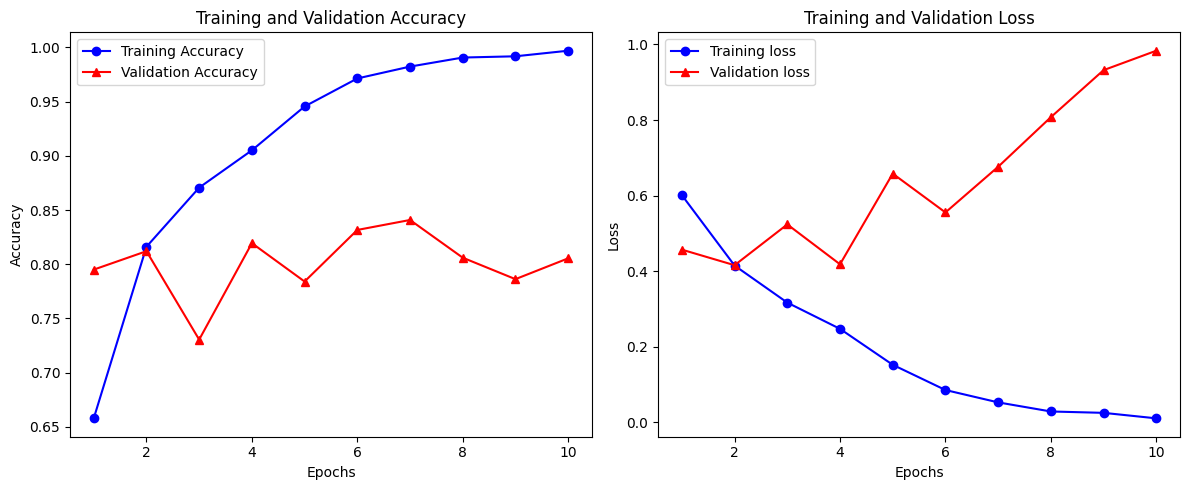

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['acc'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_acc'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

In [18]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, None))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 220ms/step - acc: 0.5593 - loss: 0.6784 - val_acc: 0.7488 - val_loss: 0.5427
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - acc: 0.7990 - loss: 0.4546 - val_acc: 0.8236 - val_loss: 0.4038
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - acc: 0.8575 - loss: 0.3395 - val_acc: 0.7300 - val_loss: 0.5605
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - acc: 0.8885 - loss: 0.2799 - val_acc: 0.7190 - val_loss: 0.7152
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - acc: 0.9198 - loss: 0.2136 - val_acc: 0.8188 - val_loss: 0.4517
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - acc: 0.9487 - loss: 0.1470 - val_acc: 0.8462 - val_loss: 0.4142
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - acc: 0.9719 - loss: 0.0884 - val_acc: 0.8492 - val_loss: 0.4674
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - acc: 0.9844 - loss: 0.0570 - val_acc: 0.8210 - val_loss: 0.5439
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

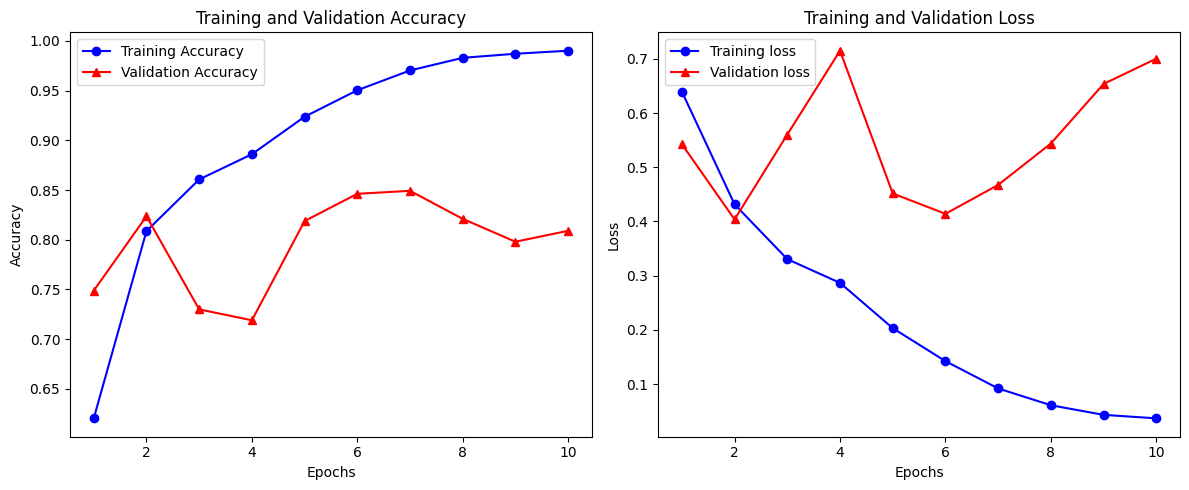

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['acc'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_acc'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

## LSTM layers

In [13]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.build(input_shape=(None, None))

In [14]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [15]:
history_lstm = model_lstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - acc: 0.5866 - loss: 0.6654 - val_acc: 0.7752 - val_loss: 0.4699
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8206 - loss: 0.4101 - val_acc: 0.8182 - val_loss: 0.4591
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.8621 - loss: 0.3341 - val_acc: 0.8332 - val_loss: 0.4263
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - acc: 0.8824 - loss: 0.2986 - val_acc: 0.8448 - val_loss: 0.3657
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.8962 - loss: 0.2637 - val_acc: 0.8496 - val_loss: 0.3445
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.9050 - loss: 0.2443 - val_acc: 0.8824 - val_loss: 0.2898
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - acc: 0.9183 - loss: 0.2188 - val_acc: 0.8704 - val_loss: 0.3082
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9295 - loss: 0.1971 - val_acc: 0.8294 - val_loss: 0.6138
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/

In [16]:
history_lstm_dict = history_lstm.history
history_lstm_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

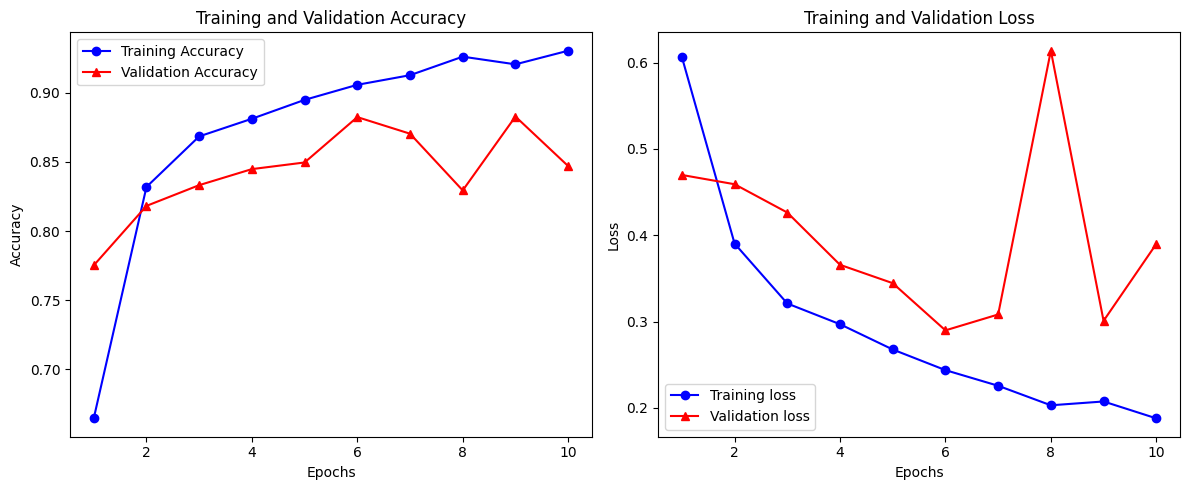

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_lstm_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_lstm_dict['acc'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_lstm_dict['val_acc'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_lstm_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_lstm_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

In [30]:
model_lstm_2 = Sequential()
model_lstm_2.add(Embedding(10000, 32))
# model_lstm_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model_lstm_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model_lstm_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))  #157/157 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - acc: 0.5381 - loss: 0.6836 - val_acc: 0.6964 - val_loss: 0.5778

model_lstm_2.add(LSTM(32, return_sequences=True))
model_lstm_2.add(LSTM(32, return_sequences=True))
model_lstm_2.add(LSTM(32))    # 157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - acc: 0.5467 - loss: 0.6721 - val_acc: 0.7356 - val_loss: 0.5241


model_lstm_2.add(Dense(1, activation='sigmoid'))

In [31]:
model_lstm_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [32]:
history_lstm_2 = model_lstm_2.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - acc: 0.5467 - loss: 0.6721 - val_acc: 0.7356 - val_loss: 0.5241
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - acc: 0.7868 - loss: 0.4601 - val_acc: 0.8120 - val_loss: 0.4274
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - acc: 0.8472 - loss: 0.3681 - val_acc: 0.8076 - val_loss: 0.4344
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - acc: 0.8807 - loss: 0.2953 - val_acc: 0.8770 - val_loss: 0.3018
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - acc: 0.8890 - loss: 0.2803 - val_acc: 0.7780 - val_loss: 0.5839
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.8981 - loss: 0.2576 - val_acc: 0.8788 - val_loss: 0.2993
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.9157 - loss: 0.2186 - val_acc: 0.8732 - val_loss: 0.3797
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - acc: 0.9180 - loss: 0.2144 - val_acc: 0.8672 - val_loss: 0.3481
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s

In [37]:
history_lstm_dict = history_lstm_2.history
history_lstm_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

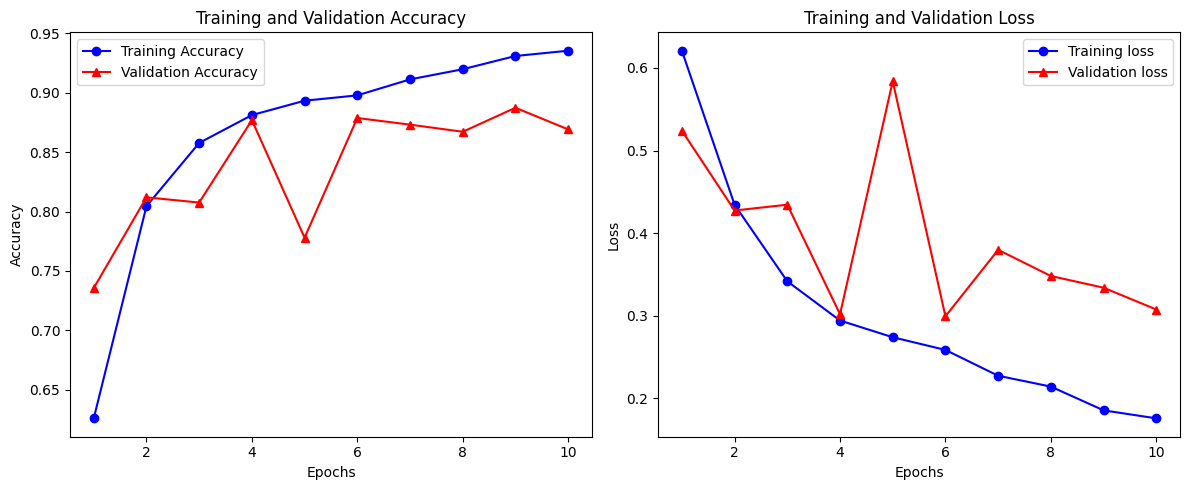

In [38]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_lstm_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_lstm_dict['acc'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_lstm_dict['val_acc'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_lstm_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_lstm_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()